In [1]:
# model training using tensorflow
from tqdm import tqdm
import numpy as np
import os
import cv2
from matplotlib import pyplot

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
'''
Configuration Code
'''
def get_n_cores():
    """The NSLOTS variable, If NSLOTS is not defined throw an exception."""
    nslots = os.getenv("NSLOTS")
    if nslots is not None:
        return int(nslots)
    raise ValueError("Environment variable NSLOTS is not defined.")


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

NUM_GPUS = len(tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", NUM_GPUS)
if NUM_GPUS > 0:
    print(os.getenv("CUDA_VISIBLE_DEVICES"))

tf.config.set_soft_device_placement(True)
tf.keras.backend.set_floatx("float32")
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(get_n_cores())

Num GPUs Available:  1
0


In [3]:
batch_size = 32

DATA_DIRECTORY = os.path.join(os.getcwd(), 'data', 'formatted_data')

size = (224,224) # height, width

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=size,
  batch_size=batch_size
)



Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


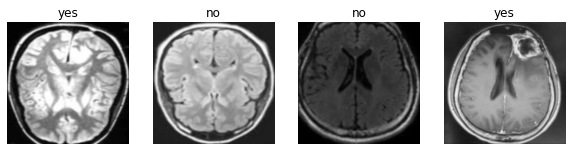

In [5]:
class_names = train_ds.class_names

pyplot.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = pyplot.subplot(1, 4, i + 1)
        pyplot.imshow(images[i].numpy().astype("uint8"))
        pyplot.title(class_names[labels[i]])
        pyplot.axis("off")
pyplot.show()

In [7]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3))

In [8]:
num_classes = 2

model = Sequential([
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [10]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
75/75 [==============================] - 6s 86ms/step - loss: 0.5654 - accuracy: 0.6929 - val_loss: 0.3465 - val_accuracy: 0.8550
Epoch 2/10
75/75 [==============================] - 4s 56ms/step - loss: 0.2840 - accuracy: 0.8858 - val_loss: 0.3635 - val_accuracy: 0.8583
Epoch 3/10
75/75 [==============================] - 4s 56ms/step - loss: 0.1865 - accuracy: 0.9300 - val_loss: 0.3003 - val_accuracy: 0.8967
Epoch 4/10
75/75 [==============================] - 4s 56ms/step - loss: 0.1077 - accuracy: 0.9604 - val_loss: 0.2334 - val_accuracy: 0.9200
Epoch 5/10
75/75 [==============================] - 4s 56ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.2005 - val_accuracy: 0.9517
Epoch 6/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.1771 - val_accuracy: 0.9550
Epoch 7/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0151 - accuracy: 0.9975 - val_loss: 0.2285 - val_accuracy: 0.9500
Epoch 8/10
75

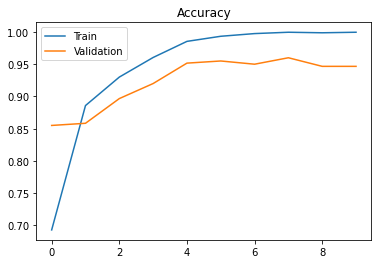

In [12]:
'''
Plot the accuracy
'''
pyplot.title("Accuracy")
pyplot.plot(range(epochs), history.history['accuracy'], label = "Train")
pyplot.plot(range(epochs), history.history['val_accuracy'], label = "Validation")
pyplot.legend()
pyplot.show()

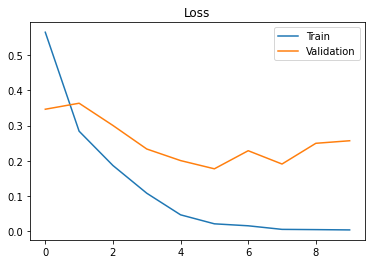

In [13]:
'''
Plot the loss
'''
pyplot.title("Loss")
pyplot.plot(range(epochs), history.history['loss'], label = "Train")
pyplot.plot(range(epochs), history.history['val_loss'], label = "Validation")
pyplot.legend()
pyplot.show()